In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from tqdm.notebook import tqdm
import seaborn as sns
%matplotlib inline

In [2]:
fuzzy_clusters_df = pd.read_csv('../data/fuzzy_merge_df.csv')

In [3]:
fuzzy_clusters_df.T

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
Cluster Name,Trevecca Center for Rehab and Healing,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Grand Hyatt Hotel (Power Design Inc) job site,...,Miss Kelli's,Miss Kelli's,Miss Kelli's,Nashville Rescue Mission - Women's Campus,Link Systems Electric,Link Systems Electric,Link Systems Electric,Link Systems Electric,Iron Tribe Belmont,Iron Tribe Belmont
Street_x,329 Murfreesboro Pike,4001 Harding Pike,4001 Harding Pike,4001 Harding Pike,4001 Harding Pike,4001 Harding Pike,4001 Harding Pike,4001 Harding Pike,4001 Harding Pike,1000 Broadway,...,207 Printers Alley,207 Printers Alley,207 Printers Alley,1716 Rosa L Parks Blvd,444 McNally Dr,444 McNally Dr,444 McNally Dr,444 McNally Dr,3201 Belmont Blvd,3201 Belmont Blvd
City_x,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,...,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville
State_x,TN,TN,TN,TN,TN,TN,TN,TN,TN,TN,...,TN,TN,TN,TN,TN,TN,TN,TN,TN,TN
Facility Type,LTCF,Construction,Construction,Construction,Construction,Construction,Construction,Construction,Construction,Construction,...,Bar,Bar,Bar,Congregate Living,Other,Other,Other,Other,Gym,Gym
Cluster Start Date,4/4/20,5/8/20,5/8/20,5/8/20,5/8/20,5/8/20,5/8/20,5/8/20,5/8/20,5/19/20,...,10/1/20,10/1/20,10/1/20,10/1/20,10/16/20,10/16/20,10/16/20,10/16/20,10/20/20,10/20/20
# Cases,102,75,75,75,75,75,75,75,75,23,...,14,14,14,70,12,12,12,12,14,14
Latitude_x,36.145,36.093,36.093,36.093,36.093,36.093,36.093,36.093,36.093,36.158,...,36.164,36.164,36.164,36.182,36.093,36.093,36.093,36.093,36.117,36.117
Longitude_x,-86.756,-86.846,-86.846,-86.846,-86.846,-86.846,-86.846,-86.846,-86.846,-86.784,...,-86.778,-86.778,-86.778,-86.797,-86.74,-86.74,-86.74,-86.74,-86.798,-86.798


In [4]:
fuzzy_clusters_df.columns

Index(['Unnamed: 0', 'Cluster Name', 'Street_x', 'City_x', 'State_x',
       'Facility Type', 'Cluster Start Date', '# Cases', 'Latitude_x',
       'Longitude_x', 'Accuracy Score_x', 'Accuracy Type_x', 'County_x',
       'Zip_x', 'Country_x', 'Source_x', 'matches', 'Request #', 'Status',
       'Date / Time Opened', 'Date / Time Closed', 'Contact Type',
       'State Issue', 'Closed When Created', 'Address', 'City_y',
       'Council District', 'ZIP', 'Latitude_y', 'Longitude_y',
       'Mapped Location', 'Unnamed: 0.1', 'Address_geo', 'City_geo', 'ZIP_geo',
       'state', 'Latitude_geo', 'Longitude_geo', 'Accuracy Score_y',
       'Accuracy Type_y', 'Number', 'Street_y', 'Unit Type', 'Unit Number',
       'City.1', 'State_y', 'County_y', 'Zip_y', 'Country_y', 'Source_y'],
      dtype='object')

In [5]:
fuzzy_clusters_df = fuzzy_clusters_df.drop(['Unnamed: 0', 'Country_x', 'matches', 'Contact Type', 
                     'State Issue', 'Closed When Created', 'Unnamed: 0.1', 
                     'Unit Type', 'Unit Number', 'Country_y', 'Latitude_y', 'Longitude_y'], axis=1)

In [6]:
fuzzy_clusters_df.T

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
Cluster Name,Trevecca Center for Rehab and Healing,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Grand Hyatt Hotel (Power Design Inc) job site,...,Miss Kelli's,Miss Kelli's,Miss Kelli's,Nashville Rescue Mission - Women's Campus,Link Systems Electric,Link Systems Electric,Link Systems Electric,Link Systems Electric,Iron Tribe Belmont,Iron Tribe Belmont
Street_x,329 Murfreesboro Pike,4001 Harding Pike,4001 Harding Pike,4001 Harding Pike,4001 Harding Pike,4001 Harding Pike,4001 Harding Pike,4001 Harding Pike,4001 Harding Pike,1000 Broadway,...,207 Printers Alley,207 Printers Alley,207 Printers Alley,1716 Rosa L Parks Blvd,444 McNally Dr,444 McNally Dr,444 McNally Dr,444 McNally Dr,3201 Belmont Blvd,3201 Belmont Blvd
City_x,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,...,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville
State_x,TN,TN,TN,TN,TN,TN,TN,TN,TN,TN,...,TN,TN,TN,TN,TN,TN,TN,TN,TN,TN
Facility Type,LTCF,Construction,Construction,Construction,Construction,Construction,Construction,Construction,Construction,Construction,...,Bar,Bar,Bar,Congregate Living,Other,Other,Other,Other,Gym,Gym
Cluster Start Date,4/4/20,5/8/20,5/8/20,5/8/20,5/8/20,5/8/20,5/8/20,5/8/20,5/8/20,5/19/20,...,10/1/20,10/1/20,10/1/20,10/1/20,10/16/20,10/16/20,10/16/20,10/16/20,10/20/20,10/20/20
# Cases,102,75,75,75,75,75,75,75,75,23,...,14,14,14,70,12,12,12,12,14,14
Latitude_x,36.145,36.093,36.093,36.093,36.093,36.093,36.093,36.093,36.093,36.158,...,36.164,36.164,36.164,36.182,36.093,36.093,36.093,36.093,36.117,36.117
Longitude_x,-86.756,-86.846,-86.846,-86.846,-86.846,-86.846,-86.846,-86.846,-86.846,-86.784,...,-86.778,-86.778,-86.778,-86.797,-86.74,-86.74,-86.74,-86.74,-86.798,-86.798
Accuracy Score_x,1,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,1,...,1,1,1,1,0.9,0.9,0.9,0.9,1,1


In [8]:
fuzzy_clusters_df.columns

Index(['Cluster Name', 'Street_x', 'City_x', 'State_x', 'Facility Type',
       'Cluster Start Date', '# Cases', 'Latitude_x', 'Longitude_x',
       'Accuracy Score_x', 'Accuracy Type_x', 'County_x', 'Zip_x', 'Source_x',
       'Request #', 'Status', 'Date / Time Opened', 'Date / Time Closed',
       'Address', 'City_y', 'Council District', 'ZIP', 'Mapped Location',
       'Address_geo', 'City_geo', 'ZIP_geo', 'state', 'Latitude_geo',
       'Longitude_geo', 'Accuracy Score_y', 'Accuracy Type_y', 'Number',
       'Street_y', 'City.1', 'State_y', 'County_y', 'Zip_y', 'Source_y'],
      dtype='object')

In [9]:
fuzzy_clusters_df.columns = ['Cluster Name', 'Street_cluster', 'City_cluster', 'State_cluster', 'Facility Type',
       'Cluster Start Date', '# Cases', 'Latitude_cluster', 'Longitude_cluster',
       'Accuracy Score_cluster', 'Accuracy Type_cluster', 'County_cluster', 'Zip_cluster', 'Source_cluster',
       'Request #', 'Status', 'Date / Time Opened', 'Date / Time Closed',
       'Address', 'City_violation', 'Council District', 'ZIP', 
        'Mapped Location', 'Address_violation', 'City_violation', 'ZIP_violation',
       'state', 'Latitude_violation', 'Longitude_violation', 'Accuracy Score_violation',
       'Accuracy Type_violation', 'Number', 'Street_violation', 'City.1', 'State_violation',
       'County_violation', 'Zip_violation', 'Source_violation']

In [10]:
fuzzy_clusters_df.head()

,Cluster Name,Street_cluster,City_cluster,State_cluster,Facility Type,Cluster Start Date,# Cases,Latitude_cluster,Longitude_cluster,Accuracy Score_cluster,...,Longitude_violation,Accuracy Score_violation,Accuracy Type_violation,Number,Street_violation,City.1,State_violation,County_violation,Zip_violation,Source_violation
0,Trevecca Center for Rehab and Healing,329 Murfreesboro Pike,Nashville,TN,LTCF,4/4/20,102,36.145,-86.756,1.0,...,-86.754560,1.0,rooftop,329,Murfreesboro Pike,Nashville,TN,Davidson County,37210,City of Nashville
1,Montgomery Bell Academy job site,4001 Harding Pike,Nashville,TN,Construction,5/8/20,75,36.093,-86.846,0.7,...,-86.834579,0.7,range_interpolation,4001,Harding Pl,Nashville,TN,Davidson County,37215,TIGER/Line® dataset from the US Census Bureau
2,Montgomery Bell Academy job site,4001 Harding Pike,Nashville,TN,Construction,5/8/20,75,36.093,-86.846,0.7,...,-86.836690,0.7,range_interpolation,4001,Harding Pl,Nashville,TN,Davidson County,37215,TIGER/Line® dataset from the US Census Bureau
3,Montgomery Bell Academy job site,4001 Harding Pike,Nashville,TN,Construction,5/8/20,75,36.093,-86.846,0.7,...,-86.834579,0.7,range_interpolation,4001,Harding Pl,Nashville,TN,Davidson County,37215,TIGER/Line® dataset from the US Census Bureau
4,Montgomery Bell Academy job site,4001 Harding Pike,Nashville,TN,Construction,5/8/20,75,36.093,-86.846,0.7,...,-86.836693,0.7,range_interpolation,4001,Harding Pl,Nashville,TN,Davidson County,37215,TIGER/Line® dataset from the US Census Bureau


In [36]:
fuzzy_clusters_df.groupby(['Cluster Name'])['# Cases'].mean()

Cluster Name
Ahava / Grace Healthcare of White's Creek         46
Belmont Village of Green Hills                    16
Dawghouse Saloon                                  14
Debra Johnson Rehab/TN Prison for Women          216
Dogwood                                           19
Good Samaritan Health & Healing                   75
Grand Hyatt Hotel (Power Design Inc) job site     23
Green Hills Center for Rehab and Healing          45
Hermitage Hall                                    93
Iron Tribe Belmont                                14
Kid Rock's Big Ass Honky Tonk                     15
Lakeshore Meadows                                 33
Life Care Center Old Hickory Village              11
Link Systems Electric                             12
Lois DeBerry Special Needs Facility               62
Loser's                                           29
Metro Water Services                              18
Miss Kelli's                                      14
Montgomery Bell Academy job site 

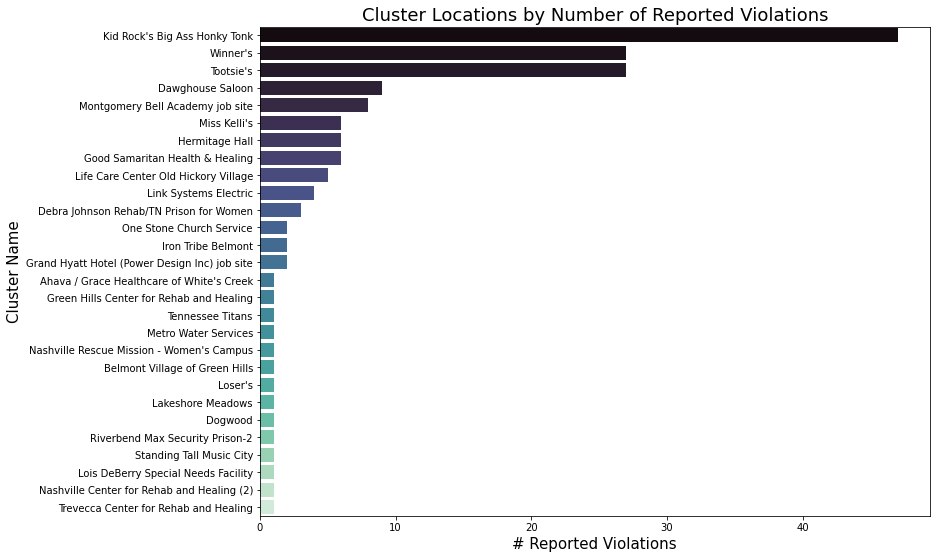

In [44]:
plt.figure(figsize=(12,9))
sns.countplot(y='Cluster Name', 
              data=fuzzy_clusters_df, 
              order = fuzzy_clusters_df['Cluster Name'].value_counts().index,
              palette="mako")
plt.xlabel('# Reported Violations', size=15)
plt.ylabel('Cluster Name', size=15)
plt.title('Cluster Locations by Number of Reported Violations', size=18);

In [ ]:
# Plot the used memory rate by account, ordered by rate
plt.figure(figsize=(15,6))
# make barplot
sns.barplot(x='ACCOUNT', y='USEDMEM_PCT_02', data=accre_grouped_by_account_sorted_by_usedmem_rate)
# set labels
plt.xlabel('Account', size=15)
plt.ylabel('Memory Utilization %', size=15)
plt.title('Memory Utilization Rate by Account, Ordered by Memory Utilization Rate', size=18)
plt.tight_layout()
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=12,8)
sns.barplot(x=)

In [ ]:
candy_plot = candy.sort_values('per_capita', ascending=False)
plt.figure(figsize=(20,7))
sns.barplot(x='state', y='per_capita', data=candy_plot)
plt.xlabel('State', size=15)
plt.ylabel('Candy Consumption per Capita (lbs)', size=15)
plt.title('Annual Candy Consumption per Capita (lbs)', size=18)
plt.xticks(rotation=45);

In [ ]:
df = pd.DataFrame([
    dict(Task="Job A", Start='2009-01-01', Finish='2009-02-28', Completion_pct=50),
    dict(Task="Job B", Start='2009-03-05', Finish='2009-04-15', Completion_pct=25),
    dict(Task="Job C", Start='2009-02-20', Finish='2009-05-30', Completion_pct=75)
])

fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task", color="Completion_pct")
fig.update_yaxes(autorange="reversed")
fig.show()

In [ ]:
df = pd.DataFrame([
    dict(Task="Job A", Start='2009-01-01', Finish='2009-02-28', Resource="Alex"),
    dict(Task="Job B", Start='2009-03-05', Finish='2009-04-15', Resource="Alex"),
    dict(Task="Job C", Start='2009-02-20', Finish='2009-05-30', Resource="Max")
])

fig = px.timeline(df, x_start="Start", x_end="Finish", y="Resource", color="Resource")
fig.show()